## **Education**

The dataset I used for this is the A+ Schools Report for 2024 in Pittsburgh, which is a PDF, in which I then took 6 different pieces of data (School Name, Neighborhood, Grade, Student Stability Rate, Teacher Approval Rate, and Student/Teacher Ratio) and put them into a CSV file.

Since there are only 57 schools in Pittsburgh, we will begin by making a graph that showcases which neighborhoods have a school, and how many those neighborhoods have.

Index(['Name', 'Neighborhood', 'Grade', 'Student Stability Rate',
       'Teacher Approval Rate', 'Student/Teacher Ratio'],
      dtype='object')


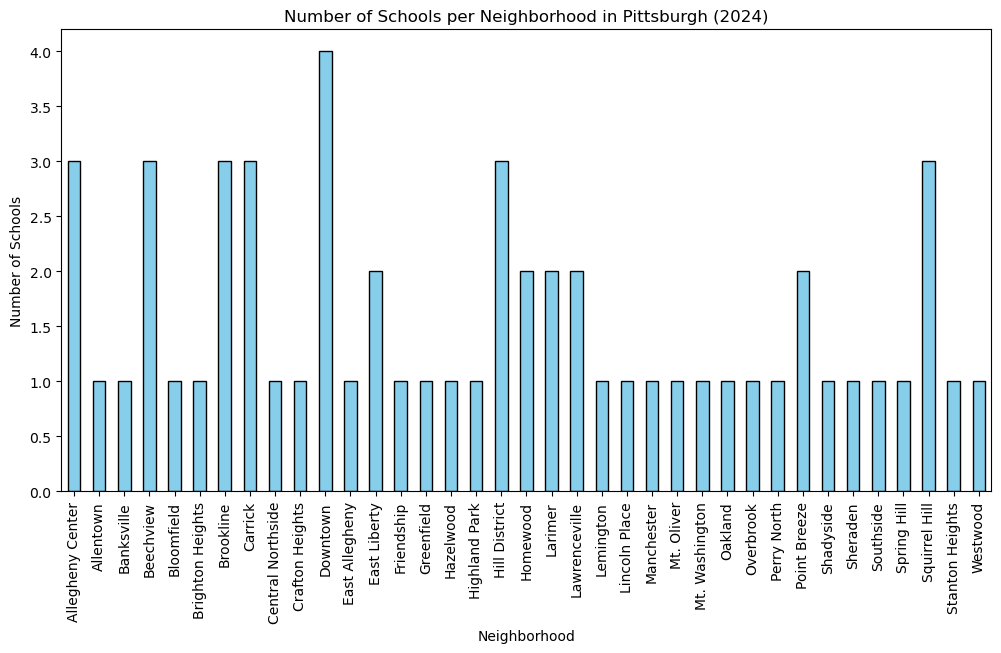

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv("Pittsburgh Education 2024.csv")
print(df.columns)
school_counts = df['Neighborhood'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
school_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Schools per Neighborhood in Pittsburgh (2024)")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Schools")
plt.xticks(rotation=90)
plt.show()

37 neighborhoods in Pittsburgh have schools, and only 12 have 2 or more. Therefore, we'll shift our focus to those 12.

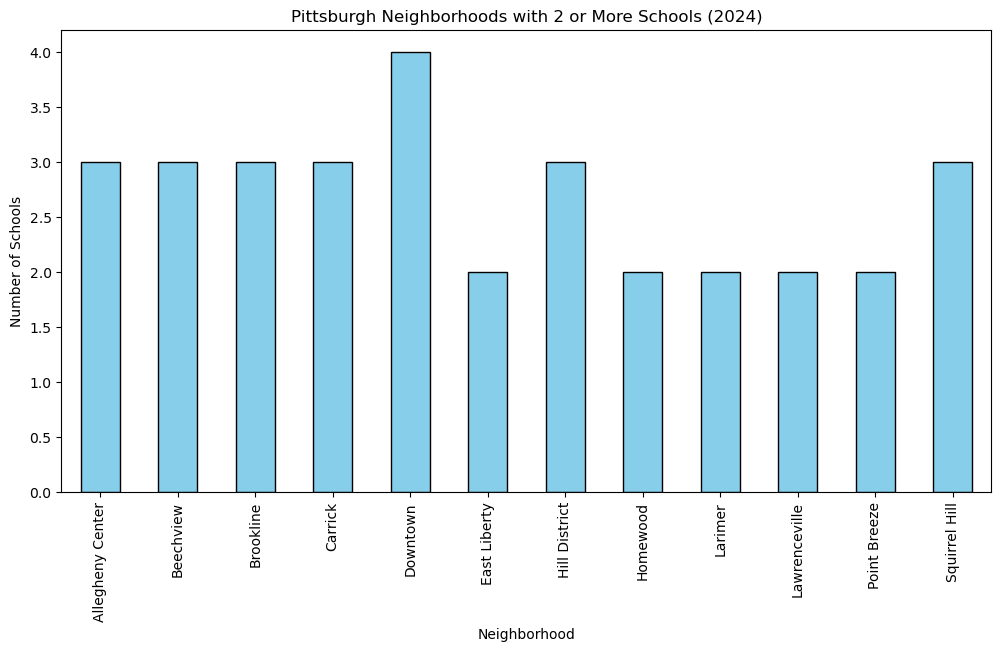

In [2]:
school_counts = school_counts[school_counts >= 2].sort_index()
plt.figure(figsize=(12, 6))
school_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Pittsburgh Neighborhoods with 2 or More Schools (2024)")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Schools")
plt.xticks(rotation=90)
plt.show()

For these 12 neighborhoods, let's take a look at their schools' average student stability rate, teacher approval rate, and student/teacher ratio, and combine them into one singular education metric.

Student stability rate showcases what percentage of students who enrolled at a particular school for a school year stayed enrolled throughout the whole year. Below is a graph of the 12 neighborhoods' average student stability rate.

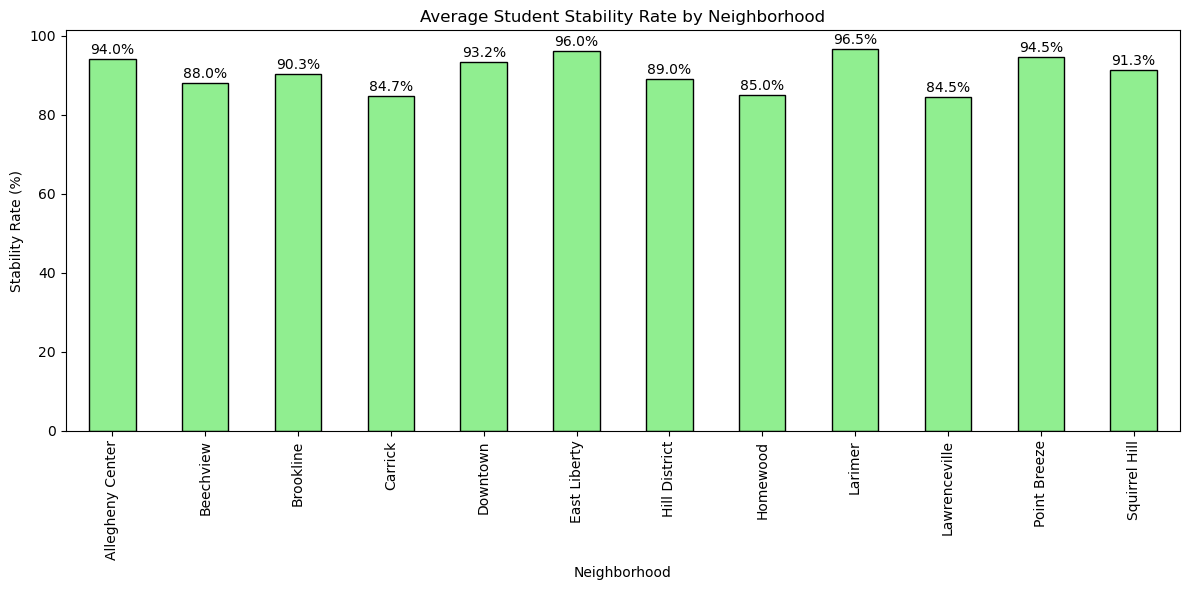

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Pittsburgh Education 2024.csv")
school_counts = df['Neighborhood'].value_counts()
valid_neighborhoods = school_counts[school_counts >= 2].index
avg_metric = df[df['Neighborhood'].isin(valid_neighborhoods)].groupby('Neighborhood')['Student Stability Rate'].mean().sort_index()
plt.figure(figsize=(12, 6))
bars = avg_metric.plot(kind='bar',color='lightgreen',edgecolor='black')
plt.title("Average Student Stability Rate by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Stability Rate (%)")
plt.xticks(rotation=90)
for i, value in enumerate(avg_metric):
    plt.text(i, value + 0.5, f"{value:.1f}%", ha='center', va='bottom')
plt.tight_layout()
plt.show()

Next is teacher approval rate, which shows how many teachers think the school they work at is a good and safe place to learn.

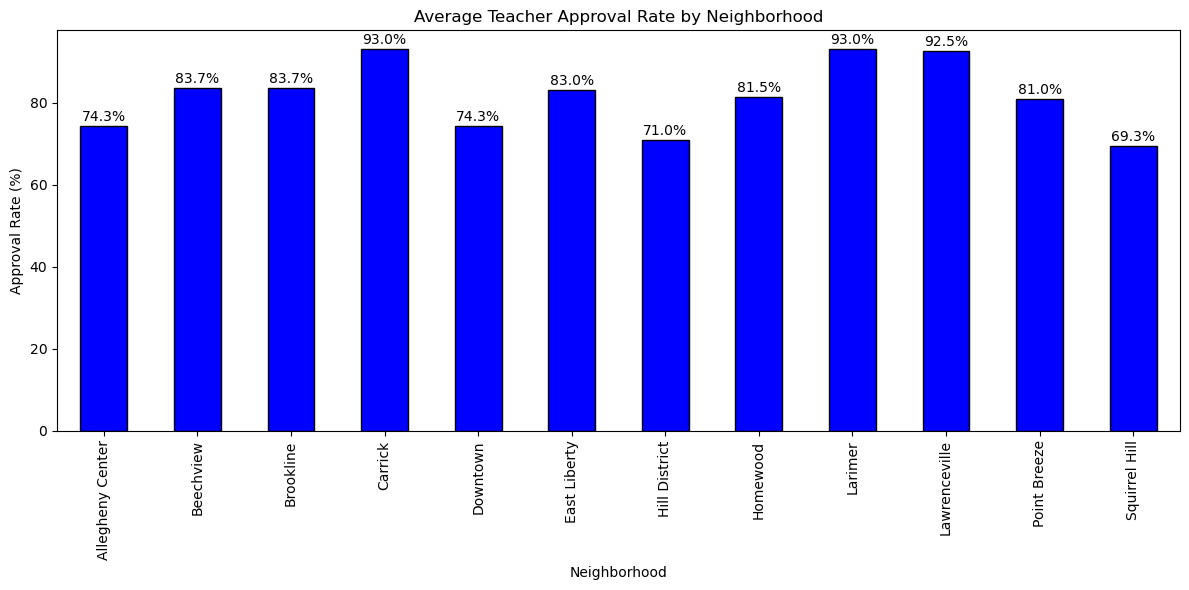

In [4]:
avg_metric = df[df['Neighborhood'].isin(valid_neighborhoods)].groupby('Neighborhood')['Teacher Approval Rate'].mean().sort_index()
plt.figure(figsize=(12, 6))
bars = avg_metric.plot(kind='bar',color='blue',edgecolor='black')
plt.title("Average Teacher Approval Rate by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Approval Rate (%)")
plt.xticks(rotation=90)
for i, value in enumerate(avg_metric):
    plt.text(i, value + 0.5, f"{value:.1f}%", ha='center', va='bottom')
plt.tight_layout()
plt.show()

Finally, we have student/teacher ratio, which shows how many students there are per teacher in the school. We would consider a lower number for this metric better, since it gives students a better ability to interact 1-on-1 with their teacher.

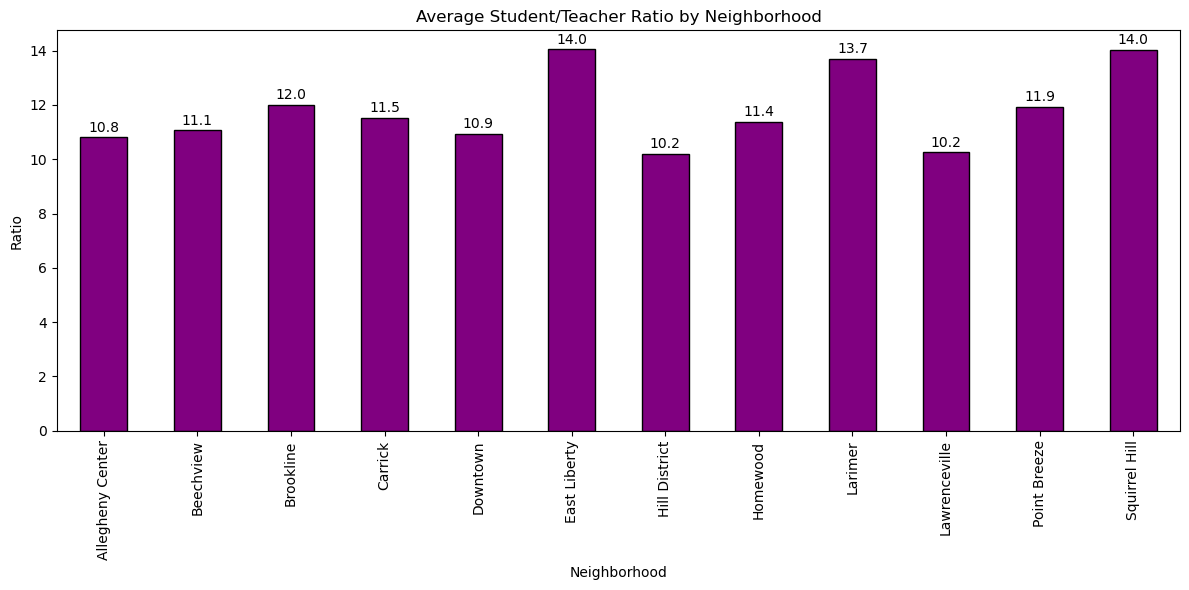

In [5]:
avg_metric = df[df['Neighborhood'].isin(valid_neighborhoods)].groupby('Neighborhood')['Student/Teacher Ratio'].mean().sort_index()
plt.figure(figsize=(12, 6))
bars = avg_metric.plot(kind='bar',color='purple',edgecolor='black')
plt.title("Average Student/Teacher Ratio by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Ratio")
plt.xticks(rotation=90)
for i, value in enumerate(avg_metric):
    plt.text(i, value + 0.1, f"{value:.1f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

We need to combine these 3 statistics into a singular "best schools" metric. To do this, I am going to change the Student/Teacher Ratio statistic into numbers that better fit our other two statistics by using "100 - Average Student/Teacher Ratio." This will give lower ratios a higher number, and put all numbers around the 80-90 range, which is similar to the range that our other statistics are in.

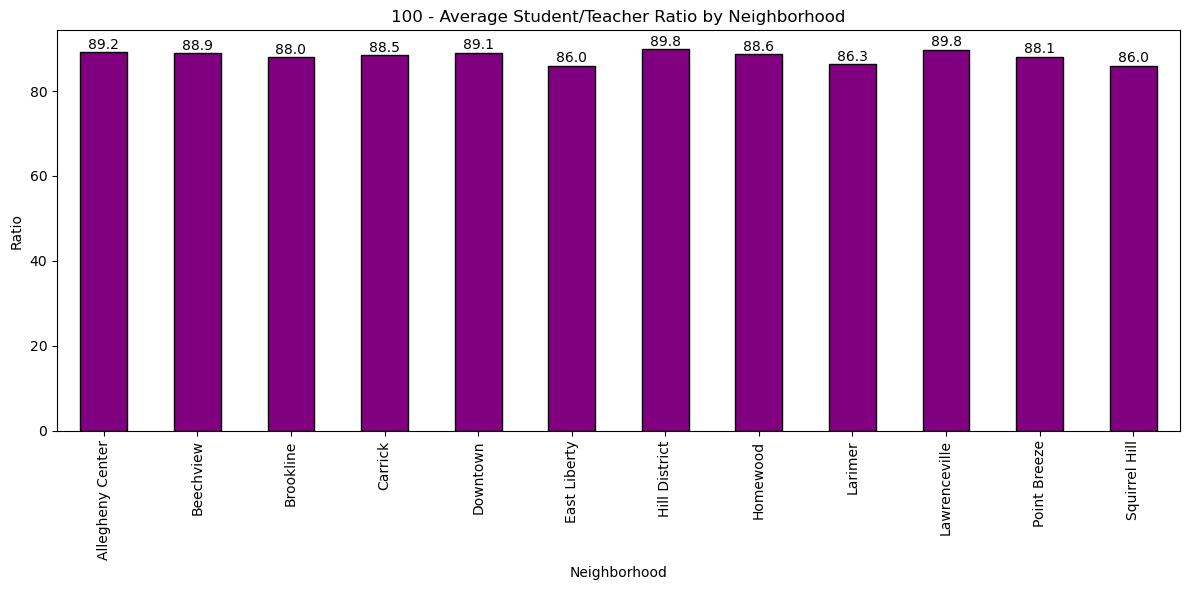

In [6]:
avg_metric = df[df['Neighborhood'].isin(valid_neighborhoods)].groupby('Neighborhood')['Student/Teacher Ratio'].mean().sort_index()
avg_metric = 100 - avg_metric
plt.figure(figsize=(12, 6))
bars = avg_metric.plot(kind='bar',color='purple',edgecolor='black')
plt.title("100 - Average Student/Teacher Ratio by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Ratio")
plt.xticks(rotation=90)
for i, value in enumerate(avg_metric):
    plt.text(i, value + 0.1, f"{value:.1f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

The differences may *seem* a lot smaller now, but they are effectively the same, just with values that are farther away from 0.

Now that we have three similar statistics, let's find the average of all three, which will be our "Best Education" metric.

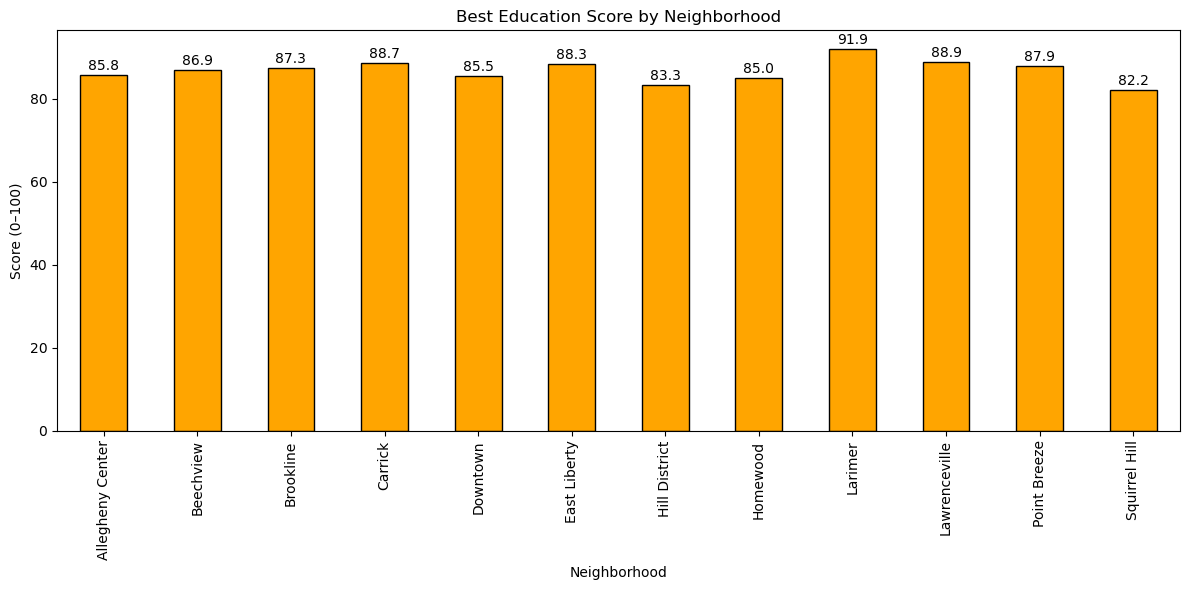

In [7]:
stability = df[df['Neighborhood'].isin(valid_neighborhoods)].groupby('Neighborhood')['Student Stability Rate'].mean()
approval = df[df['Neighborhood'].isin(valid_neighborhoods)].groupby('Neighborhood')['Teacher Approval Rate'].mean()
ratio_inverse = 100 - df[df['Neighborhood'].isin(valid_neighborhoods)].groupby('Neighborhood')['Student/Teacher Ratio'].mean()
combined = pd.concat([stability, approval, ratio_inverse], axis=1)
combined.columns = ['Stability', 'Approval', '100 - Ratio']
combined['Best Education Score'] = combined.mean(axis=1).sort_index()
plt.figure(figsize=(12, 6))
bars = combined['Best Education Score'].sort_index().plot(kind='bar', color='orange', edgecolor='black')
plt.title("Best Education Score by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Score (0–100)")
plt.xticks(rotation=90)
for i, value in enumerate(combined['Best Education Score'].sort_index()):
    plt.text(i, value + 0.5, f"{value:.1f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

And there we have it! Our education metric shows that Larimer has the best education in Pittsburgh.